In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [67]:
df=pd.read_csv("IMDB_MOVIE_DATA")

In [68]:
df.head()

,IMDB,MetaCritic,Runtime,Votes,Gross
0,8.8,74.0,148.0,1737545.0,292576195.0
1,8.1,63.0,138.0,948466.0,128012934.0
2,8.3,92.0,103.0,646084.0,415004880.0
3,8.0,79.0,108.0,621643.0,106954678.0
4,7.0,57.0,124.0,611148.0,312433331.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbd7c132310>,
      dtype=object)

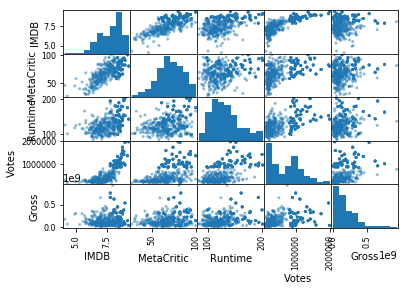

In [69]:
from pandas.plotting import scatter_matrix
scatter_matrix(df)

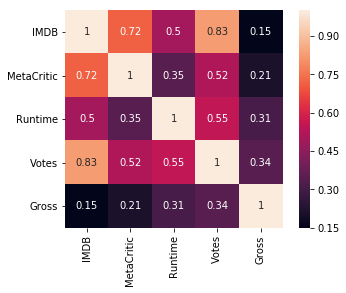

In [70]:
sns.heatmap(df.corr(),square=True,annot=True)

In [71]:
train,test=train_test_split(df,test_size=0.20)

In [72]:
x_train=train.drop("IMDB",axis=1)

In [73]:
y_train=train["IMDB"]

In [74]:
x_test=test.drop("IMDB",axis=1)
y_test=test["IMDB"]

In [75]:
reg=linear_model.LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [76]:
result_df=pd.DataFrame({"Predicted":reg.predict(x_test),"Actual":y_test})

In [77]:
#Mean Square Error
np.mean((result_df["Predicted"]-result_df["Actual"])**2)

0.1258533062079998

In [78]:
result_df.head()

,Actual,Predicted
97,6.9,7.530416
47,9.0,9.290324
483,7.6,7.647873
133,7.2,7.258287
90,8.7,8.563095


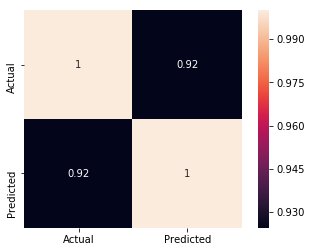

In [79]:
sns.heatmap(result_df.corr(),square=True,annot=True)

Text(0,0.5,'Actual')

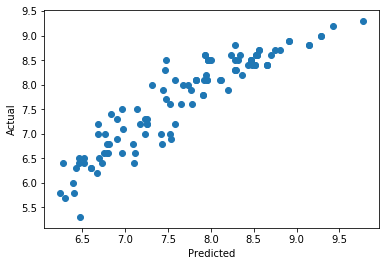

In [80]:
plt.scatter(result_df["Predicted"],result_df["Actual"])
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [81]:
print "Accuracy score:  "+str(reg.score(x_test,y_test))

Accuracy score:  0.853564534923544


In [82]:
X=df.drop("IMDB",axis=1)
Y=df["IMDB"]

In [83]:
from sklearn.cross_validation import cross_val_score,cross_val_predict
from sklearn import metrics

In [84]:
scores = cross_val_score(reg,X, Y, cv=10)
print "Cross-validated scores:"+ str(scores)

Cross-validated scores:[0.83321416 0.67064096 0.875683   0.75612092 0.77995082 0.81685159
 0.65578401 0.85382262 0.71557096 0.76906942]


Text(0,0.5,'Actual')

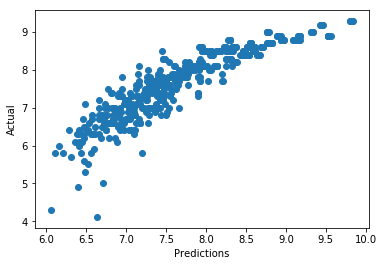

In [85]:
predictions = cross_val_predict(reg, X, Y, cv=10)
plt.scatter(predictions, Y)
plt.xlabel("Predictions")
plt.ylabel("Actual")

In [86]:
accuracy = metrics.r2_score(Y, predictions)
print "Cross-Predicted Accuracy:"+str( accuracy)

Cross-Predicted Accuracy:0.8215137803924464
